In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import matplotlib.pylab as pylab


params = {'axes.titlesize':'12',       
         'axes.labelsize': 11,
         'font.size': 10}
pylab.rcParams.update(params)

<ipython-input-14-f6fa351a5b93>:146: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='#222222'))
<ipython-input-14-f6fa351a5b93>:152: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='b'))


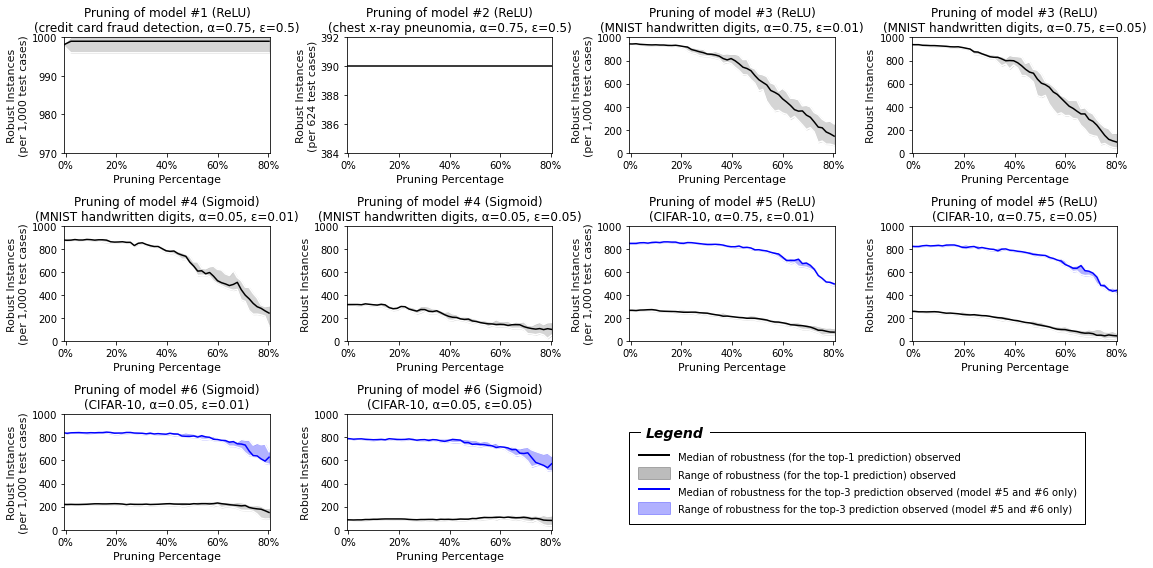

In [14]:
option_list = ['kaggle', 'chest', 'mnist-relu', 'mnist-sigmoid', 'cifar-10-relu', 'cifar-10-sigmoid', 'cifar-10-top3-relu', 'cifar-10-top3-sigmoid'] 

def plot_robustness_decay_subplot(filename, labels, ax, hide_ylabel=False):
    data = np.genfromtxt(filename, delimiter=",", names=labels, skip_header=True)

    percentage = data[labels[0]]/100-0.01
    lowests = data[labels[1]]
    highests = data[labels[2]]
    medians = data[labels[3]]

    # For cifar-10 models, add Top K assessment
    lowests_top_k = []
    highests_top_k = []
    medians_top_k = []

    if 'cifar-10' in filename:
        
        filename_top = filename.replace("cifar-10", "cifar-10-top3")
        data_top_k = np.genfromtxt(filename_top, delimiter=",", names=labels, skip_header=True)

        lowests_top_k = data_top_k[labels[1]]
        highests_top_k = data_top_k[labels[2]]
        medians_top_k = data_top_k[labels[3]] 

    lns = []
    x = np.linspace(0, 1, len(percentage))

    #color = 'tab:red'
    color = '#0f0f0f'
    #ax.set_xticklabels(percentage)
    ax.set_xlabel('Pruning Percentage')

    # color = 'tab:blue'
    if 'chest' in filename:
        ax.set_ylabel('Robust Instances\n(per 624 test cases)', color=color,
                        labelpad=3)  # we already handled the x-label with ax1
        # Set y limit
        ax.set_ylim([384, 392])
    else:
        if not hide_ylabel:
            ax.set_ylabel('Robust Instances\n(per 1,000 test cases)', color=color,
                        labelpad=3)  # we already handled the x-label with ax1
        else:
            ax.set_ylabel('Robust Instances', color=color,
                        labelpad=3)  # we already handled the x-label with ax1
        # Set y limit
        if 'kaggle' in filename:
            ax.set_ylim([970, 1000])
        elif 'mnist-robustness-e2' in filename:
            ax.set_ylim([0, 400])
        else:
            ax.set_ylim([0, 1000])
    
    ax.set_xlim([-0.00, 0.805])
    
    lns += ax.plot(percentage, lowests, color='white', linestyle='-')
    lns += ax.plot(percentage, highests, color='white', linestyle='-')
    ax.fill_between(percentage, lowests, highests, alpha=0.3, color='#777777')

    lns += ax.plot(percentage, medians, color='black', linestyle='-',label="Robustness median")
    
    if 'cifar-10' in filename:
        lns += ax.plot(percentage, lowests_top_k, color='white', linestyle='-')
        lns += ax.plot(percentage, highests_top_k, color='white', linestyle='-')
        ax.fill_between(percentage, lowests_top_k, highests_top_k, alpha=0.3, color='b')

        lns += ax.plot(percentage, medians_top_k, color='b', linestyle='-',
                    label="Top 3 Robustness median")
    # manipulate
    
    # fixing yticks with matplotlib.ticker "FixedLocator"
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:,.0%}'.format(val) for val in ax.get_xticks()])
    ax.set_xlim([-0.005, 0.805])

    labs = [l.get_label() for l in lns]
    if "cifar_10" in filename:
        legend = ax.legend(lns, labs, bbox_to_anchor=(0, 0.2), loc=3)
        legend.get_frame().set_facecolor('#EEEEEE')
    #else:
    #    legend = ax.legend(lns, labs, loc=3)
    #    legend.get_frame().set_facecolor('#EEEEEE')

# Create a white layout
gridsize = (3, 4)
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (0, 3), colspan=1, rowspan=1)
ax5 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)
ax6 = plt.subplot2grid(gridsize, (1, 1), colspan=1, rowspan=1)
ax7 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)
ax8 = plt.subplot2grid(gridsize, (1, 3), colspan=1, rowspan=1)
ax9 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1)
ax10 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1)
ax_legend = plt.subplot2grid(gridsize, (2, 2), colspan=2, rowspan=1)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ax1.title.set_text('Pruning of model #1 (ReLU)\n(credit card fraud detection, \u03B1=0.75, \u03B5=0.5)')
ax2.title.set_text('Pruning of model #2 (ReLU)\n(chest x-ray pneunomia, \u03B1=0.75, \u03B5=0.5)')
ax3.title.set_text('Pruning of model #3 (ReLU)\n(MNIST handwritten digits, \u03B1=0.75, \u03B5=0.01)')
ax4.title.set_text('Pruning of model #3 (ReLU)\n(MNIST handwritten digits, \u03B1=0.75, \u03B5=0.05)')
ax5.title.set_text('Pruning of model #4 (Sigmoid)\n(MNIST handwritten digits, \u03B1=0.05, \u03B5=0.01)')
ax6.title.set_text('Pruning of model #4 (Sigmoid)\n(MNIST handwritten digits, \u03B1=0.05, \u03B5=0.05)')
ax7.title.set_text('Pruning of model #5 (ReLU)\n(CIFAR-10, \u03B1=0.75, \u03B5=0.01)')
ax8.title.set_text('Pruning of model #5 (ReLU)\n(CIFAR-10, \u03B1=0.75, \u03B5=0.05)')
ax9.title.set_text('Pruning of model #6 (Sigmoid)\n(CIFAR-10, \u03B1=0.05, \u03B5=0.01)')
ax10.title.set_text('Pruning of model #6 (Sigmoid)\n(CIFAR-10, \u03B1=0.05, \u03B5=0.05)')

fig.tight_layout(pad=5.0, w_pad=9.0, h_pad=5.0)  # otherwise the right y-label is slightly clipped


# Read from csv file
plot_robustness_decay_subplot("logs/stat/"+option_list[0]+"-robustness.csv", ["progress", "lo", "hi", "median"], ax1)
plot_robustness_decay_subplot("logs/stat/"+option_list[1]+"-robustness.csv", ["progress", "lo", "hi", "median"], ax2)
plot_robustness_decay_subplot("logs/stat/"+option_list[2]+"-robustness-e1.csv", ["progress", "lo", "hi", "median"], ax3)
plot_robustness_decay_subplot("logs/stat/"+option_list[2]+"-robustness-e2.csv", ["progress", "lo", "hi", "median"], ax4, hide_ylabel=True)
plot_robustness_decay_subplot("logs/stat/"+option_list[3]+"-robustness-e1.csv", ["progress", "lo", "hi", "median"], ax5)
plot_robustness_decay_subplot("logs/stat/"+option_list[3]+"-robustness-e2.csv", ["progress", "lo", "hi", "median"], ax6, hide_ylabel=True)
plot_robustness_decay_subplot("logs/stat/"+option_list[4]+"-robustness-e1.csv", ["progress", "lo", "hi", "median"], ax7)
plot_robustness_decay_subplot("logs/stat/"+option_list[4]+"-robustness-e2.csv", ["progress", "lo", "hi", "median"], ax8, hide_ylabel=True)
plot_robustness_decay_subplot("logs/stat/"+option_list[5]+"-robustness-e1.csv", ["progress", "lo", "hi", "median"], ax9)
plot_robustness_decay_subplot("logs/stat/"+option_list[5]+"-robustness-e2.csv", ["progress", "lo", "hi", "median"], ax10, hide_ylabel=True)

# Create a Rectangle patch
ax_legend.set_xlim([0,30])
ax_legend.set_ylim([0,10])
ax_legend.text(1, 8, 'Legend', style='italic', fontsize=14, fontweight='bold',
        bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 1, 'pad': 5})
ax_legend.text(3, 6, 'Median of robustness (for the top-1 prediction) observed', fontsize=10)
ax_legend.text(3, 4.5, 'Range of robustness (for the top-1 prediction) observed', fontsize=10)
ax_legend.text(3, 3, 'Median of robustness for the top-3 prediction observed (model #5 and #6 only)', fontsize=10)
ax_legend.text(3, 1.5, 'Range of robustness for the top-3 prediction observed (model #5 and #6 only)', fontsize=10)

points = [[0, 0.5], [28, 0.5], [28, 8.5], [0, 8.5]]
line = ax_legend.add_patch(patches.Polygon(points, closed=True, fill=None, edgecolor='black'))

# For robustness median
points = [[0.5, 6.5], [2.5, 6.5]]
ax_legend.add_patch(patches.Polygon(points, closed=None, fill=None, linewidth='2', edgecolor='black'))
# For robustness range
points = [[0.5, 4.4], [2.5, 4.4], [2.5, 5.4], [0.5, 5.4]]
ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='#222222'))
# For top-3 robustness range
points = [[0.5, 3.5], [2.5, 3.5]]
ax_legend.add_patch(patches.Polygon(points, closed=None, fill=None, linewidth='2', edgecolor='b'))
# For top-3 robustness median
points = [[0.5, 1.4], [2.5, 1.4], [2.5, 2.4], [0.5, 2.4]]
ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='b'))
ax_legend.axis("off")

plt.tight_layout()

figure_filename = "save_figs/robustness_decay.pdf"
if os.path.exists(figure_filename):
  os.remove(figure_filename)


plt.subplots_adjust(right=0.973)
plt.savefig(figure_filename)

plt.show()
